## **8. Neural Networks and Deep Learning**

This week, we'll learn about neural nets and build a model for classifying images of clothes

### **8.1 Fashion Classification**

Dataset:
- Full: https://github.com/alexeygrigorev/clothing-dataset
- Small: https://github.com/alexeygrigorev/clothing-dataset-small

Links:
https://cs231n.github.io/

In [1]:
!git clone git@github.com:alexeygrigorev/clothing-dataset-small.git

'git' is not recognized as an internal or external command,
operable program or batch file.


## **8.2 TensorFlow and Keras**

- Installing TensorFlow
- Loading images

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import load_img

In [3]:
path = './clothing-dataset-small-master/train/t-shirt'
name = '4c5766ba-bad6-4703-877b-140991c8af87.jpg'
fullname = f'{path}/{name}'
fullname

'./clothing-dataset-small-master/train/t-shirt/4c5766ba-bad6-4703-877b-140991c8af87.jpg'

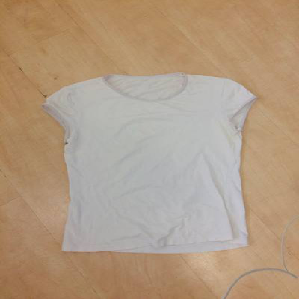

In [4]:
img = load_img(fullname, target_size=(299, 299))
img

In [5]:
X = np.array(img)
X.shape

(299, 299, 3)

In [6]:
X

array([[[161, 119,  71],
        [160, 118,  70],
        [163, 121,  73],
        ...,
        [175, 133,  93],
        [173, 131,  91],
        [171, 129,  89]],

       [[164, 122,  74],
        [164, 122,  74],
        [166, 124,  76],
        ...,
        [176, 134,  94],
        [174, 132,  92],
        [172, 130,  90]],

       [[163, 121,  73],
        [164, 122,  74],
        [163, 121,  73],
        ...,
        [173, 131,  91],
        [172, 130,  90],
        [170, 128,  88]],

       ...,

       [[152, 113,  74],
        [154, 115,  76],
        [155, 116,  77],
        ...,
        [186, 147, 108],
        [185, 145, 109],
        [185, 145, 110]],

       [[152, 113,  74],
        [154, 115,  76],
        [155, 116,  77],
        ...,
        [186, 147, 108],
        [187, 147, 111],
        [188, 148, 113]],

       [[152, 113,  74],
        [154, 115,  76],
        [155, 116,  77],
        ...,
        [186, 147, 108],
        [189, 149, 113],
        [189, 149, 114]]

### **8.3 Pre-trained convolutional neural networks**

- Imagenet dataset: https://www.image-net.org/
- Pre-trained models: https://keras.io/api/applications/

In [6]:
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.applications.xception import preprocess_input
from tensorflow.keras.applications.xception import decode_predictions

In [7]:
model = Xception(weights='imagenet', input_shape=(299, 299, 3))

In [8]:
X = np.array([X])
X.shape

(1, 299, 299, 3)

In [9]:
X = preprocess_input(X)

In [11]:
X

array([[[[ 0.26274514, -0.06666666, -0.44313723],
         [ 0.254902  , -0.0745098 , -0.45098037],
         [ 0.27843142, -0.05098039, -0.42745095],
         ...,
         [ 0.37254906,  0.04313731, -0.27058822],
         [ 0.35686278,  0.02745104, -0.2862745 ],
         [ 0.3411765 ,  0.01176476, -0.30196077]],

        [[ 0.28627455, -0.04313725, -0.41960782],
         [ 0.28627455, -0.04313725, -0.41960782],
         [ 0.30196083, -0.02745098, -0.40392154],
         ...,
         [ 0.3803922 ,  0.05098045, -0.26274508],
         [ 0.36470592,  0.03529418, -0.27843136],
         [ 0.34901965,  0.0196079 , -0.29411763]],

        [[ 0.27843142, -0.05098039, -0.42745095],
         [ 0.28627455, -0.04313725, -0.41960782],
         [ 0.27843142, -0.05098039, -0.42745095],
         ...,
         [ 0.35686278,  0.02745104, -0.2862745 ],
         [ 0.34901965,  0.0196079 , -0.29411763],
         [ 0.33333337,  0.00392163, -0.3098039 ]],

        ...,

        [[ 0.19215691, -0.11372548, -0

In [12]:
pred = model.predict(X)

1/1 [==============================] - 1s 1s/step


In [13]:
pred.shape

(1, 1000)

In [14]:
decode_predictions(pred)

[[('n03595614', 'jersey', 0.7968726),
  ('n03188531', 'diaper', 0.09726837),
  ('n04370456', 'sweatshirt', 0.021921583),
  ('n03710637', 'maillot', 0.0032661739),
  ('n02916936', 'bulletproof_vest', 0.0023236673)]]

### **8.4 Convolutional Neural Networks**

- Type of layers: convolutional and dense
- Convolutional layers and filters
- Dense layers

There are more layers. Read here: https://cs231n.github.io/

### **8.5 Transfer Learning**

- Reading data with ImageDataGenerator
- Train Xception on smaller images (150x150)

(Better to run it with a GPU)

In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [14]:
# Build image generator for training (takes preprocessing input function)
train_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

# Load in train dataset into train generator
train_ds = train_gen.flow_from_directory(directory='./clothing-dataset-small-master/train', # Train images directory
                                         target_size=(150,150), # resize images to train faster
                                         batch_size=32) # 32 images per batch

# Create image generator for validation
val_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

# Load in image for validation
val_ds = val_gen.flow_from_directory(directory='./clothing-dataset-small-master/validation', # Validation image directory
                                     target_size=(150,150),
                                     batch_size=32,
                                     shuffle=False) # False for validation

Found 3068 images belonging to 10 classes.
Found 341 images belonging to 10 classes.


In [15]:
train_ds.class_indices

{'dress': 0,
 'hat': 1,
 'longsleeve': 2,
 'outwear': 3,
 'pants': 4,
 'shirt': 5,
 'shoes': 6,
 'shorts': 7,
 'skirt': 8,
 't-shirt': 9}

In [16]:
X, y = next(train_ds)

In [17]:
y[:5]

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [27]:
# Build base model
base_model = Xception(weights='imagenet',
                      include_top=False, # to create custom dense layer
                      input_shape=(150,150,3))

# Freeze the convolutional base by preventing the weights being updated during training
base_model.trainable = False

# Define expected image shape as input
inputs = keras.Input(shape=(150,150,3))

# Feed inputs to the base model
base = base_model(inputs, training=False) # set False because the model contains BatchNormalization layer

# Convert matrices into vectors using pooling layer
vectors = keras.layers.GlobalAveragePooling2D()(base)

# Create dense layer of 10 classes
outputs = keras.layers.Dense(10)(vectors)

# Create model for training
model = keras.Model(inputs, outputs)

Found 341 images belonging to 10 classes.


In [49]:
# Define learning rate
learning_rate = 0.01

# Create optimizer
optimizer = keras.optimizers.Adam(learning_rate=learning_rate)

# Define loss function
loss = keras.losses.CategoricalCrossentropy(from_logits=True) # to keep the raw output of dense layer without applying softmax

# Compile the model
model.compile(optimizer=optimizer,
              loss=loss,
              metrics=['accuracy']) # evaluation metric accuracy

In [51]:
# Train the model, validate it with validation data, and save the training history
history = model.fit(train_ds, epochs=10, validation_data=val_ds)

Epoch 1/10
96/96 [==============================] - 87s 908ms/step - loss: 0.8666 - accuracy: 0.7562 - val_loss: 0.8888 - val_accuracy: 0.7537
Epoch 2/10
96/96 [==============================] - 77s 804ms/step - loss: 0.4771 - accuracy: 0.8465 - val_loss: 0.8313 - val_accuracy: 0.7830
Epoch 3/10
96/96 [==============================] - 76s 792ms/step - loss: 0.3386 - accuracy: 0.8820 - val_loss: 0.8502 - val_accuracy: 0.8035
Epoch 4/10
96/96 [==============================] - 82s 852ms/step - loss: 0.2079 - accuracy: 0.9267 - val_loss: 0.8180 - val_accuracy: 0.7977
Epoch 5/10
96/96 [==============================] - 91s 949ms/step - loss: 0.1532 - accuracy: 0.9417 - val_loss: 0.8997 - val_accuracy: 0.7801
Epoch 6/10
96/96 [==============================] - 88s 920ms/step - loss: 0.1299 - accuracy: 0.9557 - val_loss: 1.0469 - val_accuracy: 0.7947
Epoch 7/10
96/96 [==============================] - 88s 912ms/step - loss: 0.1010 - accuracy: 0.9651 - val_loss: 0.9562 - val_accuracy: 0.8270

In [52]:
history.history

{'loss': [0.8666120171546936,
  0.4770708382129669,
  0.3386474847793579,
  0.2078980803489685,
  0.15316608548164368,
  0.12985926866531372,
  0.10097405314445496,
  0.05919475480914116,
  0.058268968015909195,
  0.03853069618344307],
 'accuracy': [0.7561929821968079,
  0.8464797735214233,
  0.8820078372955322,
  0.9266623258590698,
  0.9416558146476746,
  0.9556714296340942,
  0.9651238322257996,
  0.9810951948165894,
  0.9823989272117615,
  0.9905475974082947],
 'val_loss': [0.8888350129127502,
  0.831305980682373,
  0.8501527905464172,
  0.8179931640625,
  0.8996555209159851,
  1.0469108819961548,
  0.9562485218048096,
  0.8525331616401672,
  0.9417603611946106,
  0.9470173716545105],
 'val_accuracy': [0.7536656856536865,
  0.7829912304878235,
  0.803519070148468,
  0.7976539731025696,
  0.7800586223602295,
  0.7947214245796204,
  0.8269794583320618,
  0.8152492642402649,
  0.8093841671943665,
  0.8181818127632141]}

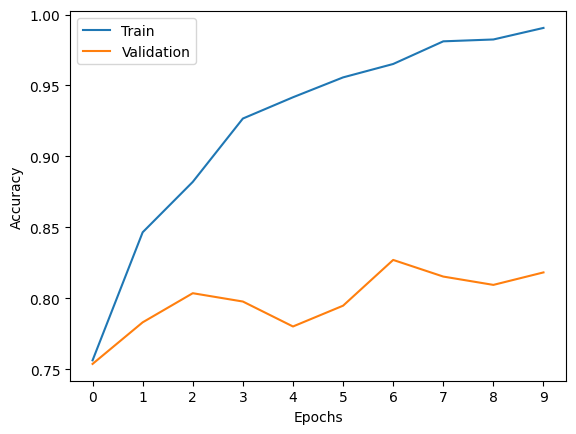

In [55]:
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.xticks(np.arange(10))
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### **8.6 Adjusting the Learning Rate**

- What's the learning rate
- Trying different values

In [18]:
def make_model(learning_rate=0.01):
    # Build base model
    base_model = Xception(
        weights='imagenet',
        include_top=False, # to create custom dense layer
        input_shape=(150,150,3)
    )

    # Freeze the convolutional base by preventing the weights being updated during training
    base_model.trainable = False

    #######################################
    
    # Define expected image shape as input
    inputs = keras.Input(shape=(150,150,3))

    # Feed inputs to the base model
    base = base_model(inputs, training=False) # set False because the model contains BatchNormalization layer

    # Convert matrices into vectors using pooling layer
    vectors = keras.layers.GlobalAveragePooling2D()(base)

    # Create dense layer of 10 classes
    outputs = keras.layers.Dense(10)(vectors)

    # Create model for training
    model = keras.Model(inputs, outputs)

    # Create optimizer
    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)

    #######################################

    # Define loss function
    loss = keras.losses.CategoricalCrossentropy(from_logits=True) # to keep the raw output of dense layer without applying softmax

    # Compile the model
    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=['accuracy']
    ) # evaluation metric accuracy

    return model

In [23]:
scores = {}

for lr in [0.0001, 0.001, 0.01, 0.1]:
    print(f"Learning Rate: {lr}")

    model = make_model(learning_rate=lr)
    history = model.fit(train_ds, epochs=10, validation_data=val_ds)
    scores[lr] = history.history

    print()

Learning Rate: 0.0001
Epoch 1/10


96/96 [==============================] - 109s 1s/step - loss: 1.9816 - accuracy: 0.3158 - val_loss: 1.5975 - val_accuracy: 0.5161
Epoch 2/10
96/96 [==============================] - 65s 676ms/step - loss: 1.3981 - accuracy: 0.5701 - val_loss: 1.2390 - val_accuracy: 0.6276
Epoch 3/10
96/96 [==============================] - 80s 839ms/step - loss: 1.1456 - accuracy: 0.6447 - val_loss: 1.0585 - val_accuracy: 0.6833
Epoch 4/10
96/96 [==============================] - 90s 942ms/step - loss: 1.0029 - accuracy: 0.6864 - val_loss: 0.9526 - val_accuracy: 0.7185
Epoch 5/10
96/96 [==============================] - 65s 676ms/step - loss: 0.9072 - accuracy: 0.7115 - val_loss: 0.8759 - val_accuracy: 0.7390
Epoch 6/10
96/96 [==============================] - 60s 626ms/step - loss: 0.8393 - accuracy: 0.7301 - val_loss: 0.8273 - val_accuracy: 0.7419
Epoch 7/10
96/96 [==============================] - 69s 722ms/step - loss: 0.7856 - accuracy: 0.7432 - val_loss: 0.7866 

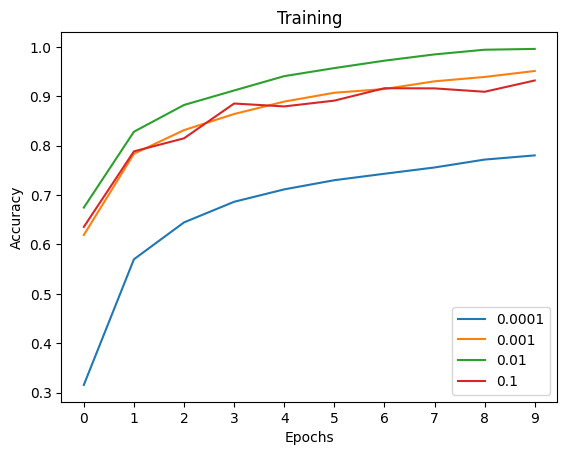

In [33]:
for lr, hist in scores.items():
    plt.plot(hist['accuracy'], label=lr)
plt.xticks(np.arange(10))
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training')
plt.legend()
plt.show()

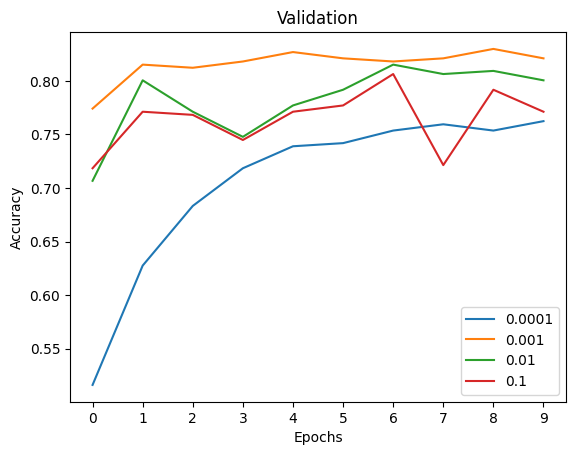

In [31]:
for lr, hist in scores.items():
    plt.plot(hist['val_accuracy'], label=lr)
plt.xticks(np.arange(10))
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Validation')
plt.legend()
plt.show()

In [34]:
learning_rate = 0.001

### **8.7 Checkpointing**

- Saving the best model only
- Training a model with callbacks

In [ ]:
model.save_weights('model_v1.h5', save_format='h5')

In [19]:
checkpoint = keras.callbacks.ModelCheckpoint(
    'xception_v1_{epoch:02d}_{val_accuracy:.3f}.h5',
    save_best_only=True,
    monitor='val_accuracy',
    mode='max'
)

In [20]:
learning_rate = 0.001

model = make_model(learning_rate=learning_rate)

history = model.fit(train_ds, epochs=10, validation_data=val_ds, callbacks=[checkpoint])

Epoch 1/10


96/96 [==============================] - ETA: 0s - loss: 1.0953 - accuracy: 0.6274

c:\Users\rluka\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


96/96 [==============================] - 112s 1s/step - loss: 1.0953 - accuracy: 0.6274 - val_loss: 0.6814 - val_accuracy: 0.7947
Epoch 2/10
96/96 [==============================] - 65s 675ms/step - loss: 0.6292 - accuracy: 0.7911 - val_loss: 0.6047 - val_accuracy: 0.7918
Epoch 3/10
96/96 [==============================] - 65s 674ms/step - loss: 0.5104 - accuracy: 0.8364 - val_loss: 0.5724 - val_accuracy: 0.8123
Epoch 4/10
96/96 [==============================] - 66s 684ms/step - loss: 0.4354 - accuracy: 0.8592 - val_loss: 0.5499 - val_accuracy: 0.8328
Epoch 5/10
96/96 [==============================] - 68s 705ms/step - loss: 0.3786 - accuracy: 0.8794 - val_loss: 0.5313 - val_accuracy: 0.8240
Epoch 6/10
96/96 [==============================] - 62s 644ms/step - loss: 0.3240 - accuracy: 0.9091 - val_loss: 0.5390 - val_accuracy: 0.8152
Epoch 7/10
96/96 [==============================] - 59s 617ms/step - loss: 0.2925 - accuracy: 0.9169 - val_loss: 0.5202 - val_accuracy: 0.8270
Epoch 8/10
9

### **8.8 Adding More Layers**

- Adding one inner dense layer
- Experimenting with different sizes of inner layer

In [22]:
def make_model(learning_rate=0.01, size_inner=100):
    # Build base model
    base_model = Xception(
        weights='imagenet',
        include_top=False, # to create custom dense layer
        input_shape=(150,150,3)
    )

    # Freeze the convolutional base by preventing the weights being updated during training
    base_model.trainable = False

    #######################################
    
    # Define expected image shape as input
    inputs = keras.Input(shape=(150,150,3))

    # Feed inputs to the base model
    base = base_model(inputs, training=False) # set False because the model contains BatchNormalization layer

    # Convert matrices into vectors using pooling layer
    vectors = keras.layers.GlobalAveragePooling2D()(base)

    # Create inner dense layer of 100
    inner = keras.layers.Dense(size_inner, activation='relu')(vectors)

    # Create dense layer of 10 classes
    outputs = keras.layers.Dense(10)(inner)

    # Create model for training
    model = keras.Model(inputs, outputs)

    # Create optimizer
    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)

    #######################################

    # Define loss function
    loss = keras.losses.CategoricalCrossentropy(from_logits=True) # to keep the raw output of dense layer without applying softmax

    # Compile the model
    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=['accuracy']
    ) # evaluation metric accuracy

    return model

In [23]:
learning_rate = 0.001

scores = {}

for size in [10, 100, 1000]:
    print(f"Size: {size}")

    model = make_model(learning_rate=learning_rate, size_inner=size)
    history = model.fit(train_ds, epochs=10, validation_data=val_ds)
    scores[size] = history.history

    print()

Size: 10
Epoch 1/10
96/96 [==============================] - 75s 696ms/step - loss: 1.8318 - accuracy: 0.3119 - val_loss: 1.4979 - val_accuracy: 0.4633
Epoch 2/10
96/96 [==============================] - 60s 621ms/step - loss: 1.2681 - accuracy: 0.5675 - val_loss: 1.1167 - val_accuracy: 0.6481
Epoch 3/10
96/96 [==============================] - 57s 590ms/step - loss: 0.9928 - accuracy: 0.6659 - val_loss: 0.9359 - val_accuracy: 0.7214
Epoch 4/10
96/96 [==============================] - 63s 659ms/step - loss: 0.8257 - accuracy: 0.7151 - val_loss: 0.7904 - val_accuracy: 0.7507
Epoch 5/10
96/96 [==============================] - 75s 778ms/step - loss: 0.6848 - accuracy: 0.7738 - val_loss: 0.7178 - val_accuracy: 0.7713
Epoch 6/10
96/96 [==============================] - 72s 746ms/step - loss: 0.5904 - accuracy: 0.8093 - val_loss: 0.6696 - val_accuracy: 0.7889
Epoch 7/10
96/96 [==============================] - 68s 710ms/step - loss: 0.5183 - accuracy: 0.8331 - val_loss: 0.6667 - val_accurac

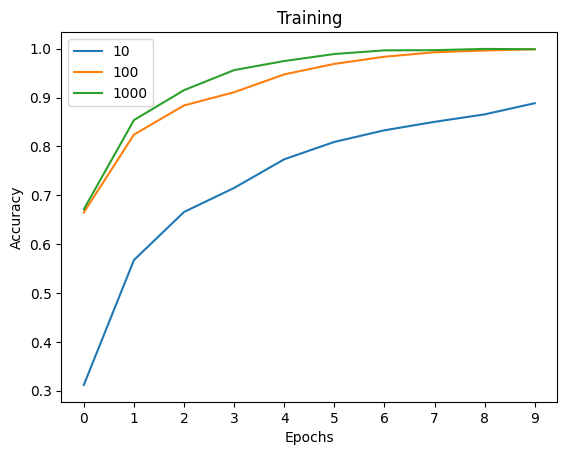

In [24]:
for score, hist in scores.items():
    plt.plot(hist['accuracy'], label=score)
plt.xticks(np.arange(10))
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training')
plt.legend()
plt.show()

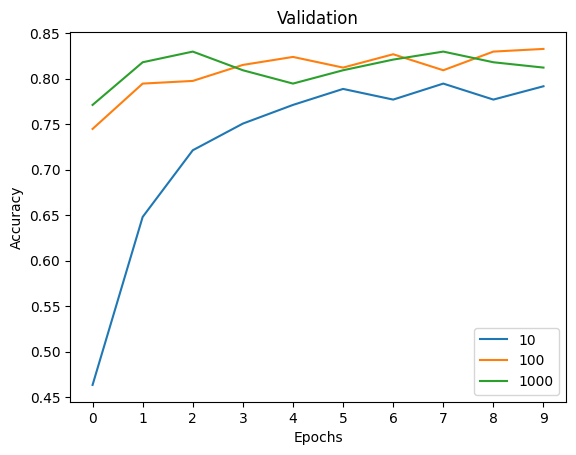

In [25]:
for score, hist in scores.items():
    plt.plot(hist['val_accuracy'], label=score)
plt.xticks(np.arange(10))
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Validation')
plt.legend()
plt.show()

### **8.9 Regularization and Dropout**

- Regularizing by freezing a part of the network
- Adding dropout to our model
- Experimenting with different values

In [13]:
def make_model(learning_rate=0.01, size_inner=100, droprate=0.5):
    # Build base model
    base_model = Xception(
        weights='imagenet',
        include_top=False, # to create custom dense layer
        input_shape=(150,150,3)
    )

    # Freeze the convolutional base by preventing the weights being updated during training
    base_model.trainable = False

    #######################################
    
    # Define expected image shape as input
    inputs = keras.Input(shape=(150,150,3))

    # Feed inputs to the base model
    base = base_model(inputs, training=False) # set False because the model contains BatchNormalization layer

    # Convert matrices into vectors using pooling layer
    vectors = keras.layers.GlobalAveragePooling2D()(base)

    # Create inner dense layer
    inner = keras.layers.Dense(size_inner, activation='relu')(vectors)

    # Create dropout layer
    drop = keras.layers.Dropout(droprate)(inner)

    # Create dense layer of 10 classes
    outputs = keras.layers.Dense(10)(drop)

    # Create model for training
    model = keras.Model(inputs, outputs)

    # Create optimizer
    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)

    #######################################

    # Define loss function
    loss = keras.losses.CategoricalCrossentropy(from_logits=True) # to keep the raw output of dense layer without applying softmax

    # Compile the model
    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=['accuracy']
    ) # evaluation metric accuracy

    return model

In [30]:
learning_rate = 0.001
size = 100

scores = {}

for droprate in [0.0, 0.2, 0.5]:
    print(f"Drop Rate: {droprate}")

    model = make_model(learning_rate=learning_rate, size_inner=size, droprate=droprate)
    history = model.fit(train_ds, epochs=10, validation_data=val_ds)
    scores[droprate] = history.history

    print()

Drop Rate: 0.0
Epoch 1/10
96/96 [==============================] - 59s 598ms/step - loss: 0.9723 - accuracy: 0.6721 - val_loss: 0.6737 - val_accuracy: 0.7566
Epoch 2/10
96/96 [==============================] - 54s 558ms/step - loss: 0.5029 - accuracy: 0.8312 - val_loss: 0.5285 - val_accuracy: 0.8152
Epoch 3/10
96/96 [==============================] - 51s 535ms/step - loss: 0.3565 - accuracy: 0.8781 - val_loss: 0.5531 - val_accuracy: 0.8006
Epoch 4/10
96/96 [==============================] - 61s 636ms/step - loss: 0.2567 - accuracy: 0.9208 - val_loss: 0.5704 - val_accuracy: 0.8182
Epoch 5/10
96/96 [==============================] - 63s 652ms/step - loss: 0.1765 - accuracy: 0.9501 - val_loss: 0.5901 - val_accuracy: 0.8006
Epoch 6/10
96/96 [==============================] - 63s 659ms/step - loss: 0.1282 - accuracy: 0.9694 - val_loss: 0.5614 - val_accuracy: 0.8240
Epoch 7/10
96/96 [==============================] - 64s 661ms/step - loss: 0.0903 - accuracy: 0.9834 - val_loss: 0.5812 - val_a

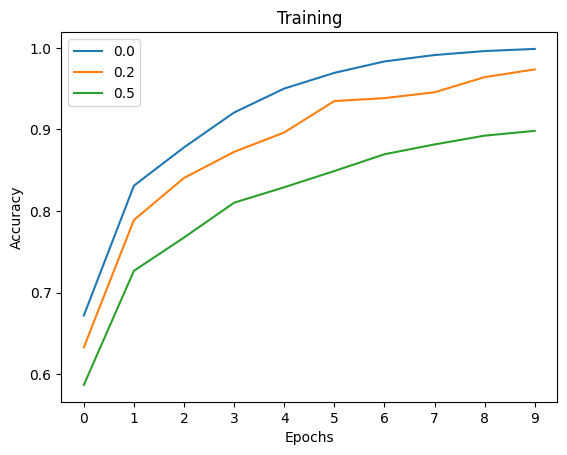

In [33]:
for droprate, hist in scores.items():
    plt.plot(hist['accuracy'], label=droprate)
plt.xlabel('Epochs')
plt.xticks(np.arange(10))
plt.ylabel('Accuracy')
plt.title('Training')
plt.legend()
plt.show()

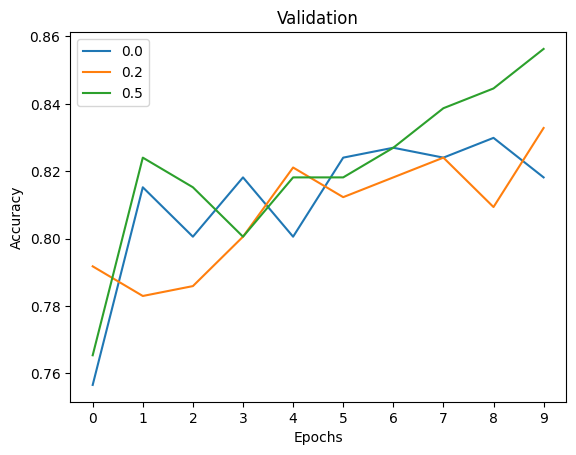

In [34]:
for droprate, hist in scores.items():
    plt.plot(hist['val_accuracy'], label=droprate)
plt.xlabel('Epochs')
plt.xticks(np.arange(10))
plt.ylabel('Accuracy')
plt.title('Validation')
plt.legend()
plt.show()

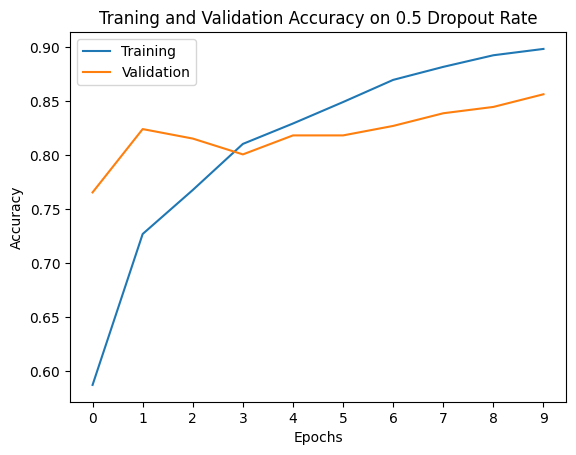

In [53]:
dropout_rate = 0.5
plt.plot(scores[dropout_rate]['accuracy'], label='Training')
plt.plot(scores[dropout_rate]['val_accuracy'], label="Validation")
plt.xlabel('Epochs')
plt.xticks(np.arange(10))
plt.ylabel('Accuracy')
plt.title('Traning and Validation Accuracy on 0.5 Dropout Rate')
plt.legend()
plt.show()

### **8.10 Data Augmentation**

- Different data augmentations
- Training a model with augmentations
- How to select data augmentations?

In [11]:
# Build image generator for training (takes preprocessing input function)
train_gen = ImageDataGenerator(preprocessing_function=preprocess_input, shear_range=10.0, zoom_range=0.1, vertical_flip=True)

# Load in train dataset into train generator
train_ds = train_gen.flow_from_directory(directory='./clothing-dataset-small-master/train', # Train images directory
                                         target_size=(150,150), # resize images to train faster
                                         batch_size=32) # 32 images per batch

# Create image generator for validation
val_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

# Load in image for validation
val_ds = val_gen.flow_from_directory(directory='./clothing-dataset-small-master/validation', # Validation image directory
                                     target_size=(150,150),
                                     batch_size=32,
                                     shuffle=False) # False for validation

Found 3068 images belonging to 10 classes.
Found 341 images belonging to 10 classes.


In [14]:
learning_rate = 0.001
size = 100
dropout_rate = 0.5

model = make_model(
    learning_rate=learning_rate,
    size_inner=size,
    droprate=dropout_rate
)

history = model.fit(train_ds, epochs=20, validation_data=val_ds)

Epoch 1/20


96/96 [==============================] - 137s 1s/step - loss: 1.5148 - accuracy: 0.5003 - val_loss: 0.8439 - val_accuracy: 0.7419
Epoch 2/20
96/96 [==============================] - 62s 643ms/step - loss: 1.1476 - accuracy: 0.6287 - val_loss: 0.7375 - val_accuracy: 0.7654
Epoch 3/20
96/96 [==============================] - 74s 769ms/step - loss: 1.0059 - accuracy: 0.6516 - val_loss: 0.6909 - val_accuracy: 0.7683
Epoch 4/20
96/96 [==============================] - 77s 797ms/step - loss: 0.9354 - accuracy: 0.6770 - val_loss: 0.6947 - val_accuracy: 0.8006
Epoch 5/20
96/96 [==============================] - 79s 820ms/step - loss: 0.8892 - accuracy: 0.7005 - val_loss: 0.6676 - val_accuracy: 0.7654
Epoch 6/20
96/96 [==============================] - 73s 756ms/step - loss: 0.8326 - accuracy: 0.7099 - val_loss: 0.6536 - val_accuracy: 0.7801
Epoch 7/20
96/96 [==============================] - 60s 618ms/step - loss: 0.7795 - accuracy: 0.7324 - val_loss: 0.6423 - val_accuracy: 0.7889

In [18]:
history.history

{'loss': [1.514837622642517,
  1.1475845575332642,
  1.005914330482483,
  0.9354055523872375,
  0.8892397284507751,
  0.8326343894004822,
  0.7794787287712097,
  0.7537276744842529,
  0.7553310394287109,
  0.7171023488044739,
  0.6697947382926941,
  0.6510348916053772,
  0.6393699049949646,
  0.6136384010314941,
  0.6371773481369019,
  0.5750327110290527,
  0.5622987747192383,
  0.5597521066665649,
  0.5321097373962402,
  0.5413438677787781],
 'accuracy': [0.5003259181976318,
  0.62874835729599,
  0.6515645384788513,
  0.6769882440567017,
  0.7004563212394714,
  0.7099087238311768,
  0.7323989272117615,
  0.7441329956054688,
  0.7379400134086609,
  0.7467405200004578,
  0.7744458913803101,
  0.770860493183136,
  0.7698826789855957,
  0.7874836921691895,
  0.7718383073806763,
  0.7913950681686401,
  0.8041068911552429,
  0.8129074573516846,
  0.8102998733520508,
  0.8070403933525085],
 'val_loss': [0.8438647389411926,
  0.7374529838562012,
  0.6909322738647461,
  0.6946542859077454,
  0

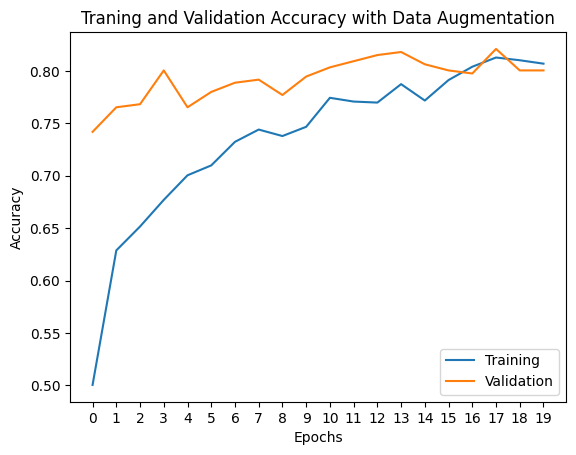

In [19]:
plt.plot(history.history['accuracy'], label='Training')
plt.plot(history.history['val_accuracy'], label="Validation")
plt.xlabel('Epochs')
plt.xticks(np.arange(20))
plt.ylabel('Accuracy')
plt.title('Traning and Validation Accuracy with Data Augmentation')
plt.legend()
plt.show()

### **8.11 Training a Larger Model**

- Train a 299x299 model

In [20]:
def make_model(input_size=150, learning_rate=0.01, size_inner=100, droprate=0.5):
    # Build base model
    base_model = Xception(
        weights='imagenet',
        include_top=False, # to create custom dense layer
        input_shape=(input_size,input_size,3)
    )

    # Freeze the convolutional base by preventing the weights being updated during training
    base_model.trainable = False

    #######################################
    
    # Define expected image shape as input
    inputs = keras.Input(shape=(input_size,input_size,3))

    # Feed inputs to the base model
    base = base_model(inputs, training=False) # set False because the model contains BatchNormalization layer

    # Convert matrices into vectors using pooling layer
    vectors = keras.layers.GlobalAveragePooling2D()(base)

    # Create inner dense layer
    inner = keras.layers.Dense(size_inner, activation='relu')(vectors)

    # Create dropout layer
    drop = keras.layers.Dropout(droprate)(inner)

    # Create dense layer of 10 classes
    outputs = keras.layers.Dense(10)(drop)

    # Create model for training
    model = keras.Model(inputs, outputs)

    # Create optimizer
    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)

    #######################################

    # Define loss function
    loss = keras.losses.CategoricalCrossentropy(from_logits=True) # to keep the raw output of dense layer without applying softmax

    # Compile the model
    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=['accuracy']
    ) # evaluation metric accuracy

    return model

In [27]:
# Build image generator for training (takes preprocessing input function)
train_gen = ImageDataGenerator(preprocessing_function=preprocess_input, shear_range=10, zoom_range=0.1, horizontal_flip=True)

# Load in train dataset into train generator
train_ds = train_gen.flow_from_directory(directory='./clothing-dataset-small-master/train', # Train images directory
                                         target_size=(299,299), # resize images to train faster
                                         batch_size=32) # 32 images per batch

# Create image generator for validation
val_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

# Load in image for validation
val_ds = val_gen.flow_from_directory(directory='./clothing-dataset-small-master/validation', # Validation image directory
                                     target_size=(299,299),
                                     batch_size=32,
                                     shuffle=False) # False for validation

Found 3068 images belonging to 10 classes.
Found 341 images belonging to 10 classes.


In [23]:
checkpoint = keras.callbacks.ModelCheckpoint(
    'xception_v4_{epoch:02d}_{val_accuracy:.3f}.h5',
    save_best_only=True,
    monitor='val_accuracy',
    mode='max'
)

In [29]:
learning_rate = 0.0005
size = 100
dropout_rate = 0.5
input_size=299

model = make_model(
    input_size=input_size,
    learning_rate=learning_rate,
    size_inner=size,
    droprate=dropout_rate
)

history = model.fit(train_ds, epochs=10, validation_data=val_ds, callbacks=[checkpoint])

Epoch 1/10
96/96 [==============================] - ETA: 0s - loss: 1.2291 - accuracy: 0.6229

c:\Users\rluka\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


96/96 [==============================] - 315s 3s/step - loss: 1.2291 - accuracy: 0.6229 - val_loss: 0.6456 - val_accuracy: 0.8035
Epoch 2/10
96/96 [==============================] - 283s 3s/step - loss: 0.6629 - accuracy: 0.7875 - val_loss: 0.4933 - val_accuracy: 0.8387
Epoch 3/10
96/96 [==============================] - 248s 3s/step - loss: 0.5568 - accuracy: 0.8145 - val_loss: 0.4255 - val_accuracy: 0.8651
Epoch 4/10
96/96 [==============================] - 277s 3s/step - loss: 0.4970 - accuracy: 0.8426 - val_loss: 0.3999 - val_accuracy: 0.8768
Epoch 5/10
96/96 [==============================] - 303s 3s/step - loss: 0.4409 - accuracy: 0.8553 - val_loss: 0.3961 - val_accuracy: 0.8768
Epoch 6/10
96/96 [==============================] - 306s 3s/step - loss: 0.4254 - accuracy: 0.8566 - val_loss: 0.3776 - val_accuracy: 0.8710
Epoch 7/10
96/96 [==============================] - 299s 3s/step - loss: 0.3837 - accuracy: 0.8657 - val_loss: 0.3644 - val_accuracy: 0.8768
Epoch 8/10
96/96 [======

### **8.12 Using the Model**

- Loading the model
- Evaluating the model
- Getting predictions

In [30]:
model = keras.models.load_model('xception_v4_09_0.880.h5')

In [31]:
# Create image generator for test
test_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

# Load in image for validation
test_ds = test_gen.flow_from_directory(directory='./clothing-dataset-small-master/test', # Test image directory
                                     target_size=(299,299),
                                     batch_size=32,
                                     shuffle=False) # False for test

Found 372 images belonging to 10 classes.


In [32]:
model.evaluate(test_ds)

12/12 [==============================] - 28s 2s/step - loss: 0.2703 - accuracy: 0.9032


[0.2702896296977997, 0.9032257795333862]

In [35]:
path = "./clothing-dataset-small-master/test/dress/8c6b26f9-e3d4-483b-99bd-db4f6beff442.jpg"

In [36]:
img = load_img(path, target_size=(299, 299))

In [39]:
x = np.array(img)
X = np.array([x])
X.shape

(1, 299, 299, 3)

In [40]:
X = preprocess_input(X)

In [42]:
pred = model.predict(X)

1/1 [==============================] - 0s 254ms/step


array([ 4.946802  , -0.70684445,  1.8086036 , -2.9703155 , -1.7538109 ,
        0.6276679 , -3.442664  , -2.3641717 , -0.39937782,  1.8057023 ],
      dtype=float32)

In [46]:
classes = [
    'dress',
    'hat',
    'longsleeve',
    'outwear',
    'pants',
    'shirt',
    'shoes',
    'shorts',
    'skirt',
    't-shirt'
]

In [47]:
dict(zip(classes, pred[0]))

{'dress': 4.946802,
 'hat': -0.70684445,
 'longsleeve': 1.8086036,
 'outwear': -2.9703155,
 'pants': -1.7538109,
 'shirt': 0.6276679,
 'shoes': -3.442664,
 'shorts': -2.3641717,
 'skirt': -0.39937782,
 't-shirt': 1.8057023}

### **8.13 Summary**

- We can use pre-trained models for general image classification
- Convolutional layers let us turn an image into a vector
- Dense layers use the vector to make the predictions
- Instead of training a model from scratch, we can use transfer learning and re-use already trained convolutional layers
- First, train a small model (150x150) before training a big one (299x299)
- Learning rate - how fast the model trians. Fast learners aren't always best ones
- We can save the best model using callbacks and checkpointing
- To avoid overfitting, use dropout and augmentation

### **8.14 Explore More**

- Add more data, e.g. Zalando, etc (ADD LINKS)
- Albumentations - another way of generating augmentations
- Use PyTorch or MXNet instead of TensorFlow/Keras
- In addition to Xception, there are others architectures - try them

Other projects:
- cats vs dogs
- Hotdog vs not hotdog
- Category of images